<a href="https://colab.research.google.com/github/FZsara/image_processing/blob/main/ip_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import drive
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First Image uploaded: /content/drive/MyDrive/bird.bmp
First Image dimensions: (1152, 648)
Second Image uploaded: /content/drive/MyDrive/home.bmp
Second Image dimensions: (1152, 648)


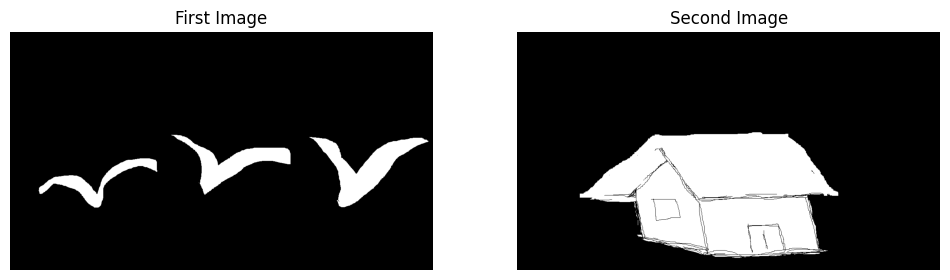

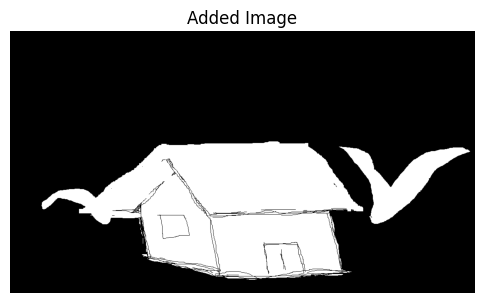

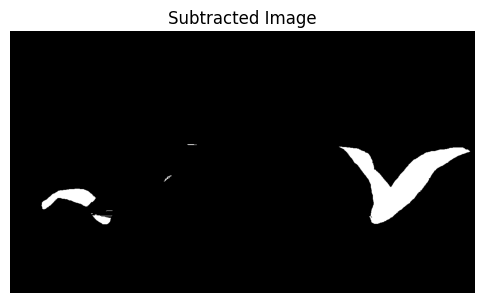

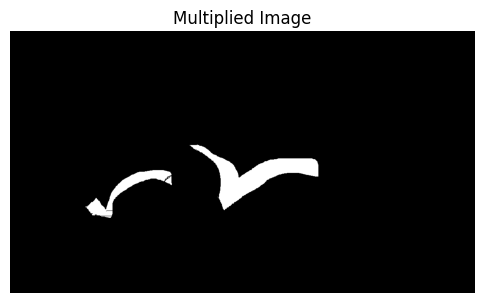

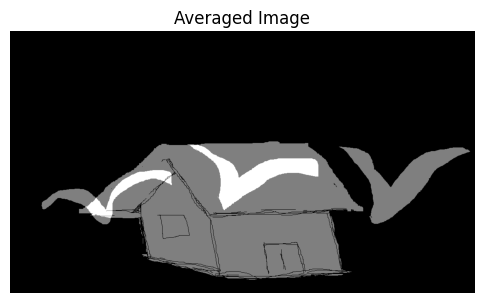

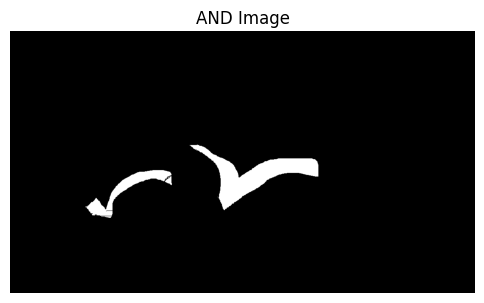

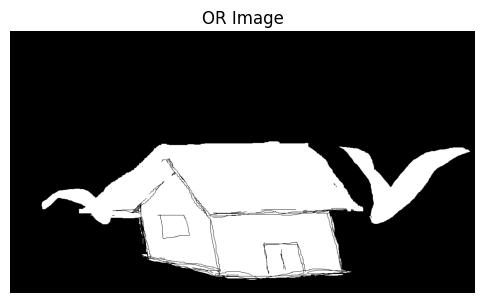

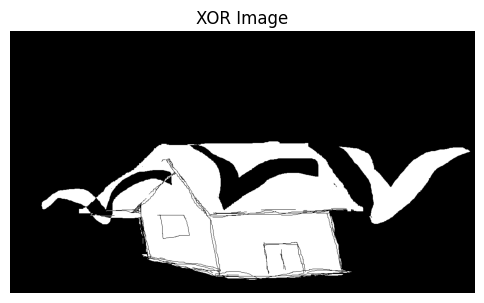

In [ ]:
# Define image processing functions

def add_images(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = min(img1[i][j] + img2[i][j], 255)  # Cap at 255 for grayscale

    return result

def subtract_images(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = max(img1[i][j] - img2[i][j], 0)  # Min at 0 for grayscale

    return result

def multiply_images(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = min((img1[i][j] * img2[i][j]) // 255, 255)  # Normalize

    return result

def average_images(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = (img1[i][j] + img2[i][j]) // 2  # Average the two pixels

    return result

def logical_and(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = img1[i][j] & img2[i][j]  # Bitwise AND

    return result

def logical_or(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = img1[i][j] | img2[i][j]  # Bitwise OR

    return result

def logical_xor(img1, img2):
    height = len(img1)
    width = len(img1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            result[i][j] = img1[i][j] ^ img2[i][j]  # Bitwise XOR

    return result # Added return statement to return the result image

image_path1 = '/content/drive/MyDrive/bird.bmp'
image_path2 = '/content/drive/MyDrive/home.bmp'

# Open the first image file
img1 = Image.open(image_path1)
# Convert the first image to grayscale
img1 = img1.convert("L")
# Convert the first image to a 2D list (numpy array)
img1_array = np.array(img1).tolist()

# Open the second image file
img2 = Image.open(image_path2)
# Convert the second image to grayscale
img2 = img2.convert("L")
# Convert the second image to a 2D list (numpy array)
img2_array = np.array(img2).tolist()

# Print the shapes and display the images
print("First Image uploaded:", image_path1)
print("First Image dimensions:", img1.size)
print("Second Image uploaded:", image_path2)
print("Second Image dimensions:", img2.size)

# Display images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('First Image')
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Second Image')
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.show()

# Perform operations
added = add_images(img1_array, img2_array)
subtracted = subtract_images(img1_array, img2_array)
multiplied = multiply_images(img1_array, img2_array)
averaged = average_images(img1_array, img2_array)
and_result = logical_and(img1_array, img2_array)
or_result = logical_or(img1_array, img2_array)
xor_result = logical_xor(img1_array, img2_array)

# Display results
def display_result(image_data, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')
    plt.show()

display_result(added, "Added Image")
display_result(subtracted, "Subtracted Image")
display_result(multiplied, "Multiplied Image")
display_result(averaged, "Averaged Image")
display_result(and_result, "AND Image")
display_result(or_result, "OR Image")
display_result(xor_result, "XOR Image")

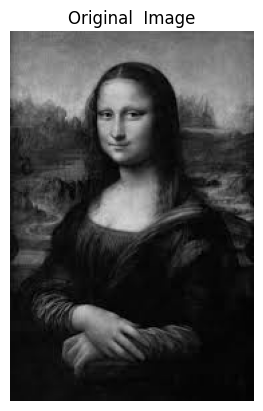

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image
image_path = '/content/drive/MyDrive/grey.jpg'
img = np.array(Image.open(image_path))

# Display the original image
plt.imshow(img)
plt.title("Original  Image")
plt.axis('off')
plt.show()


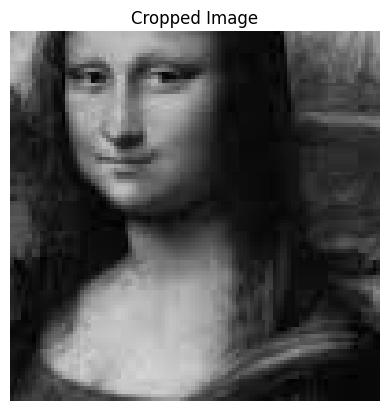

In [ ]:
# Clipping/Cropping
def crop_image(img, start_row, start_col, end_row, end_col):
    cropped_img = np.zeros((end_row - start_row, end_col - start_col, img.shape[2]), dtype=img.dtype)
    for i in range(start_row, end_row):
        for j in range(start_col, end_col):
            for k in range(3):  # RGB channels
                cropped_img[i - start_row, j - start_col, k] = img[i, j, k]
    return cropped_img

# Example crop coordinates
start_row, start_col = 50, 50
end_row, end_col = 150, 150
cropped_img = crop_image(img, start_row, start_col, end_row, end_col)

plt.imshow(cropped_img)
plt.title("Cropped Image")
plt.axis('off')
plt.show()


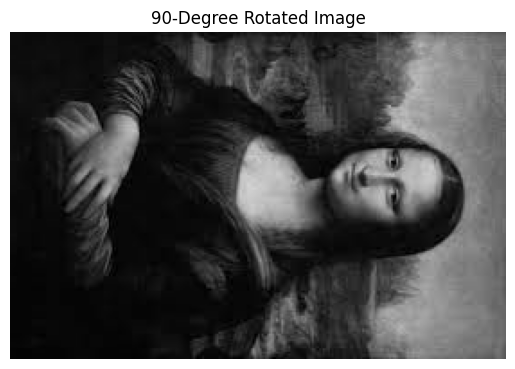

In [ ]:
# Rotate 90 degrees clockwise
def rotate_90_clockwise(img):
    rotated_img = np.zeros((img.shape[1], img.shape[0], img.shape[2]), dtype=img.dtype)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):  # RGB channels
                rotated_img[j, img.shape[0] - 1 - i, k] = img[i, j, k]
    return rotated_img

rotated_img = rotate_90_clockwise(img)

plt.imshow(rotated_img)
plt.title("90-Degree Rotated Image")
plt.axis('off')
plt.show()


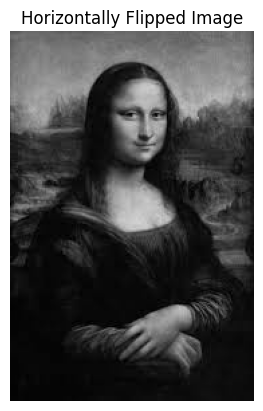

In [ ]:
# Horizontal Flip
def flip_horizontal(img):
    flipped_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):  # RGB channels
                flipped_img[i, j, k] = img[i, img.shape[1] - 1 - j, k]
    return flipped_img

flipped_img = flip_horizontal(img)

plt.imshow(flipped_img)
plt.title("Horizontally Flipped Image")
plt.axis('off')
plt.show()


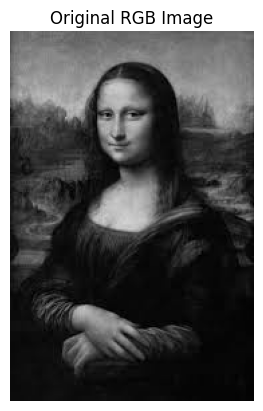

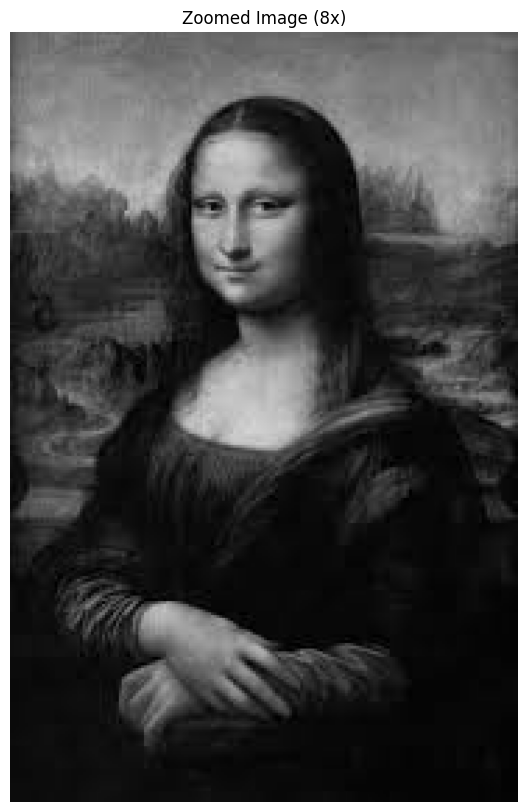

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image
image_path = '/content/drive/MyDrive/grey.jpg'
img = np.array(Image.open(image_path))

# Display the original RGB image
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()

# Zoom (Scale Up) without using built-in functions
def zoom_image(img, scale_factor=8):
    original_height, original_width, num_channels = img.shape
    zoomed_height, zoomed_width = int(original_height * scale_factor), int(original_width * scale_factor)

    # Initialize the zoomed image array
    zoomed_img = np.zeros((zoomed_height, zoomed_width, num_channels), dtype=img.dtype)

    # Scale each pixel by duplicating its value in the zoomed image
    for i in range(zoomed_height):
        for j in range(zoomed_width):
            for k in range(num_channels):
                # Map the pixel in the zoomed image to the original image
                original_i = int(i / scale_factor)
                original_j = int(j / scale_factor)
                zoomed_img[i, j, k] = img[original_i, original_j, k]

    return zoomed_img

# Apply the zoom function with a larger scale factor
zoomed_img = zoom_image(img, scale_factor=8)

# Display the zoomed image
plt.figure(figsize=(10, 10))
plt.imshow(zoomed_img)
plt.title("Zoomed Image (8x)")
plt.axis('off')
plt.show()
